#Computer Vision Vegetables

##Import Libraries

In [ ]:
# mount GDrives
from google.colab import drive
drive.mount('/content/gdrive')

GDRIVE_PATH = 'gdrive/MyDrive/Ai Mentorship/Computer Vision/Datasets/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras import Model, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2

In [ ]:
labels = ['pumpkin', 'tomato', 'watermelon']
img_size = 224 # refers to paper

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [ ]:
train = get_data (GDRIVE_PATH+'vegetable/train')
val = get_data (GDRIVE_PATH+'vegetable/validation')

<ipython-input-9-6eb9c27f48fe>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


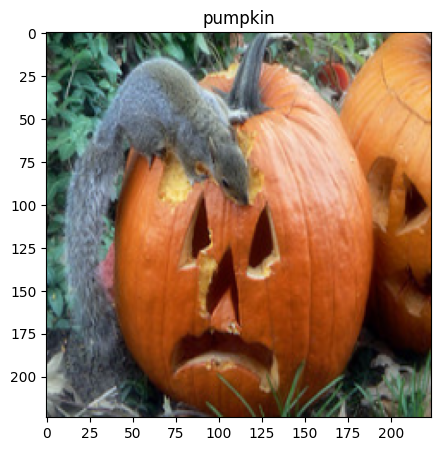

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])
plt.show()

In [ ]:
cls_plot = []

In [ ]:
for i in train:
    if(i[1] == 0):
        cls_plot.append('pumpkin')
    elif (i[1] == 1):
        cls_plot.append('tomato')
    else:
        cls_plot.append("watermelon")

In [ ]:
import seaborn as sns

cls_plot = []
for i in train:
    if(i[1] == 0):
        cls_plot.append('pumpkin')
    elif (i[1] == 1):
        cls_plot.append('tomato')
    else:
        cls_plot.append("watermelon")

sns.set_style('darkgrid')
sns.countplot(cls_plot)


ValueError: ignored

In [ ]:
train_images = []
train_labels = []
val_images = []
val_labels = []

for feature, label in train:
  train_images.append(feature)
  train_labels.append(label)

for feature, label in val:
  val_images.append(feature)
  val_labels.append(label)

# Normalize the data
train_images = np.array(train_images) / 255
val_images = np.array(val_images) / 255

# train_images.reshape(-1, img_size, img_size, 1)
train_labels = np.array(train_labels)

# val_images.reshape(-1, img_size, img_size, 1)
val_labels = np.array(val_labels)


In [ ]:
train_labels = keras.utils.to_categorical(train_labels, 3)
val_labels = keras.utils.to_categorical(val_labels, 3)


In [ ]:
model = keras.Sequential()
weight_decay = 0.0008
model_input = (224, 224, 3)

model.add(Conv2D(64, (3, 3), padding='same', input_shape=model_input, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))



In [ ]:
opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save the checkpoint in the /output folder
file_path = "gdrive/MyDrive/Ai Mentorship/Computer Vision/checkpoints_2/model_vgg_6.hdf5"

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, periode=5, mode='auto')


In [ ]:
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=50, batch_size=16, callbacks=[checkpoint])


Epoch 1/50


ValueError: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
maxepoches = 50
epochs_range = range(maxepoches)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
